In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torchvision import models
from torchvision import transforms as tf
import torch.nn.functional as F



In [3]:
#vgg model

vgg = models.vgg19(pretrained=True).features




Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [4]:
#freeze pretrained layers

for param in vgg.parameters():
    param.requires_grad_(False)

In [5]:
device = torch.device("cpu")

if torch.cuda.is_available():
    device = torch.device("cuda")
    
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [10]:
#VGG19  arch with layer number
Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (19): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (20): ReLU(inplace=True)
  (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (22): ReLU(inplace=True)
  (23): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (24): ReLU(inplace=True)
  (25): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (26): ReLU(inplace=True)
  (27): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (29): ReLU(inplace=True)
  (30): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (31): ReLU(inplace=True)
  (32): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (33): ReLU(inplace=True)
  (34): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (35): ReLU(inplace=True)
  (36): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

device(type='cpu')

In [7]:
# normalize input data with mean aand std (according to pytorch standard) ------  expect input img pixel in range [0,1]
mean = (0.485, 0.456, .406)
std = (0.229, 0.224, 0.225)

In [79]:
#function to transform the input image to suitable image to vgg19 input image
#this function preserve the aspect ratio....
def transformation (img):
    
    tasks = tf.Compose([tf.Resize(256),
                       tf.ToTensor(),
                       tf.Normalize(mean, std)])  # making image 256*256
    
    img = tasks(img)
    
    img = img.unsqueeze(0)   # adding one more dimension to make input image suitable to vgg19 input.
    
    return img

In [82]:
content_img = Image.open("../input/images/clock_image.JPG").convert('RGB')

In [83]:
style_img = Image.open("../input/images/starry_night.jpg").convert('RGB')

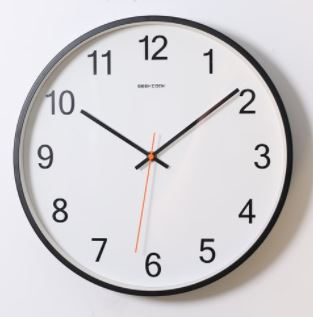

In [30]:
content_img

In [69]:
#content_img.size

(313, 317)

In [73]:
#content_img = content_img.resize((256, 256), Image.ANTIALIAS)

#style_img  = style_img.resize((256,256))

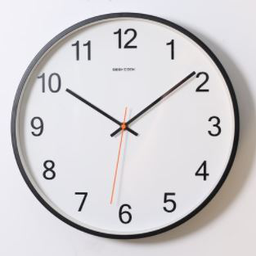

In [74]:
content_img

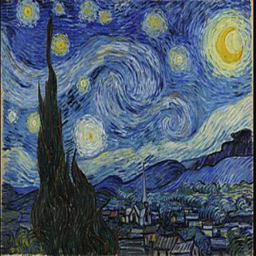

In [75]:
style_img

In [84]:
#let's transform and upload to device
content_img = transformation(content_img).to(device)

style_img  = transformation(style_img).to(device)

In [85]:
content_img.shape


torch.Size([1, 3, 259, 256])

In [86]:
style_img.shape

torch.Size([1, 3, 256, 326])

In [87]:
#above image aspect ratio preserved 
#above image has channels, height, width  ----> we want height, width, channels
#below function will clone the image , convert to numpy and squeeze the first dimension, then do the transpose ----> make tensor image to suitable for matplotlib

def tensor_to_image(tensor):
    
    image =  tensor.clone().detach()
    
    image =  image.cpu().numpy().squeeze()
    
    image = image.transpose(1,2,0)  # for  matplot lib 
    
    image *= np.array(std) + np.array(mean)  #  de normalize image
     
    image = image.clip(0,1)  # clip all values in (0,1)
    
    return image
     


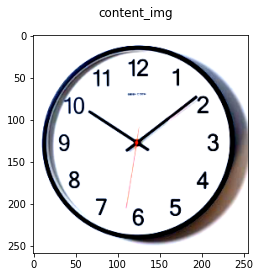

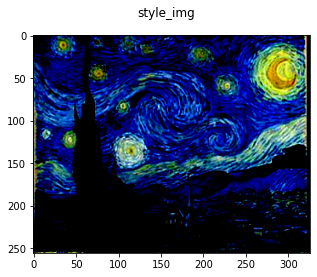

In [89]:
img = tensor_to_image(content_img)
flg = plt.figure()
flg.suptitle("content_img")
plt.imshow(img)

img = tensor_to_image(style_img)
flg = plt.figure()
flg.suptitle("style_img")
plt.imshow(img)




In [90]:
# select layers from model

LAYER_OF_INTEREST = {'0': 'conv1_1',
                     '5': 'conv2_1',
                     '10': 'conv3_1',
                     '19': 'conv4_1',
                     '21': 'conv5_1',
                     '28': 'conv6_1'}
'''
#VGG19  arch with layer number
Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (19): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (20): ReLU(inplace=True)
  (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (22): ReLU(inplace=True)
  (23): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (24): ReLU(inplace=True)
  (25): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (26): ReLU(inplace=True)
  (27): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (29): ReLU(inplace=True)
  (30): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (31): ReLU(inplace=True)
  (32): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (33): ReLU(inplace=True)
  (34): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (35): ReLU(inplace=True)
  (36): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)  '''

'\n#VGG19  arch with layer number\nSequential(\n  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n  (1): ReLU(inplace=True)\n  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n  (3): ReLU(inplace=True)\n  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)\n  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n  (6): ReLU(inplace=True)\n  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n  (8): ReLU(inplace=True)\n  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)\n  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n  (11): ReLU(inplace=True)\n  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n  (13): ReLU(inplace=True)\n  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n  (15): ReLU(inplace=True)\n  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), paddi

In [93]:
def apply_model_and_extract_feature(image, model):
    x = image
    
    features = {}
    
    for name , layer in model._modules.items():
        x = layer(x)
        
        if name in LAYER_OF_INTEREST:
            features[LAYER_OF_INTEREST[name]]  = x
            
            
    return features

In [94]:
content_image_features = apply_model_and_extract_feature(content_img, vgg)

style_image_features = apply_model_and_extract_feature(style_img, vgg)

In [95]:
content_image_features

{'conv1_1': tensor([[[[1.2708, 2.1000, 2.1000,  ..., 1.7961, 1.7961, 1.2461],
           [1.1350, 1.7794, 1.7794,  ..., 1.4989, 1.4989, 1.1223],
           [1.1350, 1.7794, 1.7794,  ..., 1.4989, 1.4989, 1.1223],
           ...,
           [0.9781, 1.5716, 1.5716,  ..., 1.3158, 1.3158, 0.9670],
           [0.9781, 1.5716, 1.5716,  ..., 1.3158, 1.3143, 0.9621],
           [0.2439, 0.5288, 0.5288,  ..., 0.3684, 0.3650, 0.1557]],
 
          [[0.0000, 2.6996, 2.6996,  ..., 2.4860, 2.4860, 5.3052],
           [0.0000, 0.3140, 0.3140,  ..., 0.3160, 0.3160, 5.0677],
           [0.0000, 0.3140, 0.3140,  ..., 0.3160, 0.3160, 5.0677],
           ...,
           [0.0000, 0.3132, 0.3132,  ..., 0.3157, 0.3157, 4.7377],
           [0.0000, 0.3132, 0.3132,  ..., 0.3157, 0.3216, 4.7178],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.4789]],
 
          [[1.3884, 1.0685, 1.0685,  ..., 0.8835, 0.8835, 0.4162],
           [2.0630, 1.1525, 1.1525,  ..., 0.9698, 0.9698, 0.5004],
           [2

In [97]:
#style and texture information using gram matrix
def calculate_gram_matrix(tensor):
    _, channels, height, width = tensor.size()
    
    tensor = tensor.view(channels, height*width)  # flatten
    
    gram_matrix = torch.mm(tensor, tensor.t())
    
    gram_matrix = gram_matrix.div(channels*height*width)   #normalize  
    
    return gram_matrix
    
    
    

In [101]:
len(style_image_features)

6

In [102]:
style_features_gram_matrix  = {layer : calculate_gram_matrix(style_image_features[layer]) for layer in style_image_features}

In [103]:
style_features_gram_matrix

{'conv1_1': tensor([[1.3279e-04, 1.7736e-04, 2.0008e-05,  ..., 8.1704e-05, 6.7287e-05,
          2.0523e-04],
         [1.7736e-04, 1.5951e-02, 2.1282e-05,  ..., 8.7053e-03, 2.3119e-03,
          4.6852e-03],
         [2.0008e-05, 2.1282e-05, 3.0192e-05,  ..., 1.7033e-06, 2.4563e-05,
          6.3330e-05],
         ...,
         [8.1704e-05, 8.7053e-03, 1.7033e-06,  ..., 3.0256e-02, 6.3456e-03,
          7.3981e-03],
         [6.7287e-05, 2.3119e-03, 2.4563e-05,  ..., 6.3456e-03, 3.3811e-03,
          1.9031e-03],
         [2.0523e-04, 4.6852e-03, 6.3330e-05,  ..., 7.3981e-03, 1.9031e-03,
          5.6684e-03]], device='cuda:0'),
 'conv2_1': tensor([[0.0201, 0.0039, 0.0136,  ..., 0.0127, 0.0010, 0.0038],
         [0.0039, 0.0356, 0.0135,  ..., 0.0383, 0.0028, 0.0055],
         [0.0136, 0.0135, 0.0411,  ..., 0.0318, 0.0019, 0.0074],
         ...,
         [0.0127, 0.0383, 0.0318,  ..., 0.1119, 0.0052, 0.0158],
         [0.0010, 0.0028, 0.0019,  ..., 0.0052, 0.0088, 0.0031],
         [0.

In [104]:
#style info
weigths = {"conv1_1" : 1.0, "conv2_1" : 0.75, "conv3_1" : 0.35, "conv4_1" : 0.25, "conv5_1" : 0.15 }


In [106]:
target =  content_img.clone().requires_grad_(True).to(device)

optimizer = optim.Adam([target], lr=0.003)


In [110]:
# let's start epochs

for i in range(1,4000):
    
    
    target_features = apply_model_and_extract_feature(target, vgg)
    
    content_loss = F.mse_loss(target_features['conv4_1'], content_image_features['conv4_1'])
    
    style_loss = 0
    
    for layer in weigths:
        
        
        target_feature = target_features[layer]
        
        target_gram_matrix = calculate_gram_matrix(target_feature)
        style_gram_matrix = style_features_gram_matrix[layer]
        
        layer_loss = F.mse_loss(target_gram_matrix,style_gram_matrix)
        layer_loss *=weigths[layer]
        
        style_loss += layer_loss
        
    total_loss = 1000000 * style_loss + content_loss
    
    if i%50 ==0:
        print('Epoch {}:, style loss : {:4f}, content loss : {:4f}'.format(i,style_loss, content_loss))
        
        
    optimizer.zero_grad()
    
    total_loss.backward()
    
    optimizer.step()

Epoch 50:, style loss : 0.000006, content loss : 5.148308
Epoch 100:, style loss : 0.000006, content loss : 5.141087
Epoch 150:, style loss : 0.000006, content loss : 5.134590
Epoch 200:, style loss : 0.000006, content loss : 5.128945
Epoch 250:, style loss : 0.000006, content loss : 5.122577
Epoch 300:, style loss : 0.000006, content loss : 5.117193
Epoch 350:, style loss : 0.000006, content loss : 5.110800
Epoch 400:, style loss : 0.000006, content loss : 5.104063
Epoch 450:, style loss : 0.000006, content loss : 5.097749
Epoch 500:, style loss : 0.000006, content loss : 5.091442
Epoch 550:, style loss : 0.000006, content loss : 5.085236
Epoch 600:, style loss : 0.000005, content loss : 5.079237
Epoch 650:, style loss : 0.000005, content loss : 5.072567
Epoch 700:, style loss : 0.000005, content loss : 5.065967
Epoch 750:, style loss : 0.000005, content loss : 5.060521
Epoch 800:, style loss : 0.000005, content loss : 5.054685
Epoch 850:, style loss : 0.000005, content loss : 5.04856

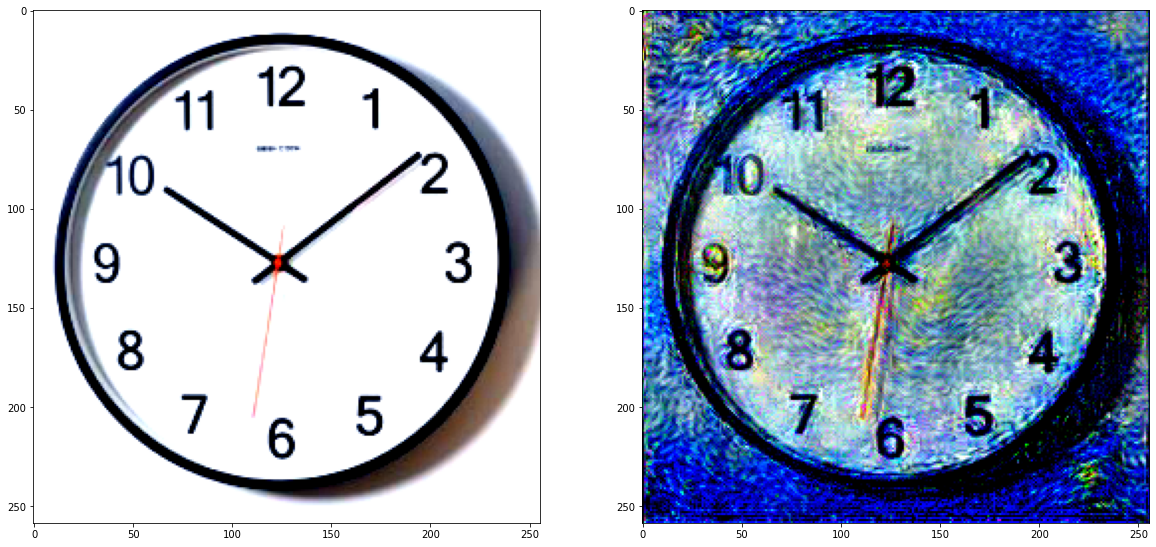

In [111]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (20,10))
ax1.imshow(tensor_to_image(content_img))
ax2.imshow(tensor_to_image(target))

In [113]:
# using alexnet 

alexnet = models.alexnet(pretrained = True).features

for param in alexnet.parameters():
    param.requires_grad_(False)

In [114]:
alexnet.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [115]:
#random try

LAYER_OF_INTERREST = {'0':'conv1_1', '3':'conv2_1','6':'conv3_1','8':'conv3_2','10':'conv3_3' }

In [116]:
content_image_features = apply_model_and_extract_feature(content_img, alexnet)

style_image_features = apply_model_and_extract_feature(style_img, alexnet)

In [117]:
style_features_gram_matrix  = {layer : calculate_gram_matrix(style_image_features[layer]) for layer in style_image_features}

In [118]:
weigths = {"conv1_1" : 1.0, "conv2_1" : 0.8, "conv3_1" : 0.25}

In [119]:
target =  content_img.clone().requires_grad_(True).to(device)

optimizer = optim.RMSprop([target], lr=0.003)

In [121]:
for i in range(1,4000):
    
    
    target_features = apply_model_and_extract_feature(target, alexnet)
    
    content_loss = F.mse_loss(target_features['conv3_1'], content_image_features['conv3_1'])
    
    style_loss = 0
    
    for layer in weigths:
        
        
        target_feature = target_features[layer]
        
        target_gram_matrix = calculate_gram_matrix(target_feature)
        style_gram_matrix = style_features_gram_matrix[layer]
        
        layer_loss = F.mse_loss(target_gram_matrix,style_gram_matrix)
        layer_loss *=weigths[layer]
        
        style_loss += layer_loss
        
    total_loss = 1000000 * style_loss + content_loss
    
    if i%50 ==0:
        print('Epoch {}:, style loss : {:4f}, content loss : {:4f}'.format(i,style_loss, content_loss))
        
        
    optimizer.zero_grad()
    
    total_loss.backward()
    
    optimizer.step()

Epoch 50:, style loss : 0.000351, content loss : 0.980202
Epoch 100:, style loss : 0.000231, content loss : 1.315961
Epoch 150:, style loss : 0.000187, content loss : 1.433842
Epoch 200:, style loss : 0.000164, content loss : 1.496783
Epoch 250:, style loss : 0.000148, content loss : 1.524859
Epoch 300:, style loss : 0.000134, content loss : 1.536317
Epoch 350:, style loss : 0.000121, content loss : 1.540059
Epoch 400:, style loss : 0.000109, content loss : 1.558785
Epoch 450:, style loss : 0.000097, content loss : 1.575168
Epoch 500:, style loss : 0.000086, content loss : 1.582530
Epoch 550:, style loss : 0.000075, content loss : 1.580002
Epoch 600:, style loss : 0.000064, content loss : 1.573513
Epoch 650:, style loss : 0.000055, content loss : 1.577685
Epoch 700:, style loss : 0.000048, content loss : 1.573147
Epoch 750:, style loss : 0.000041, content loss : 1.557564
Epoch 800:, style loss : 0.000036, content loss : 1.545882
Epoch 850:, style loss : 0.000032, content loss : 1.53752

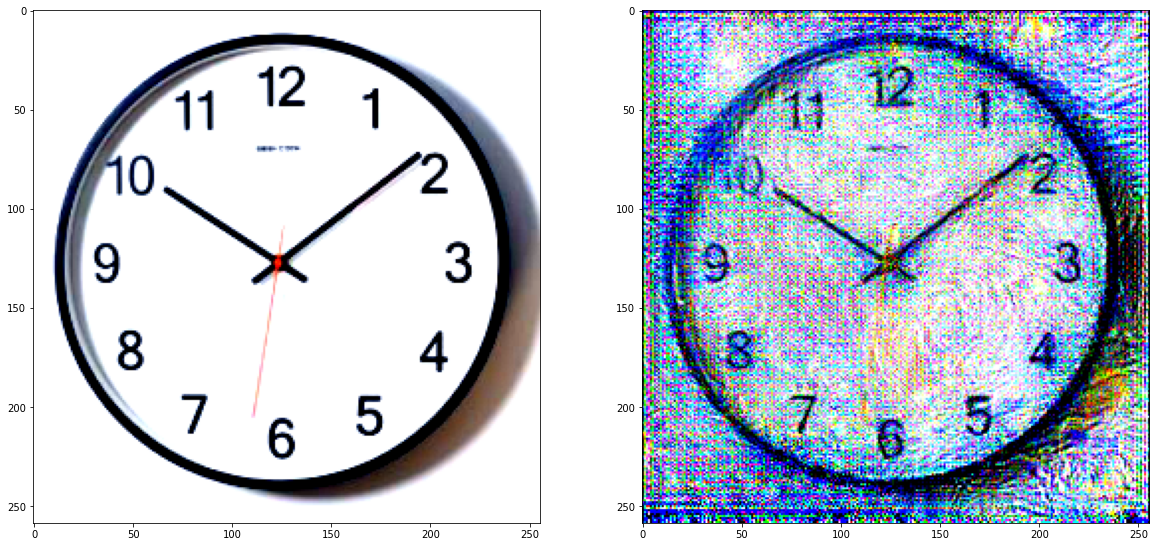

In [122]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (20,10))
ax1.imshow(tensor_to_image(content_img))
ax2.imshow(tensor_to_image(target))